In [59]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib


### First look at the data and merging datasets

Features\
● Store - the store number\
● Date - the week\
● Temperature - average temperature in the region\
● Fuel_Price - cost of fuel in the region\
● MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only
available after Nov 2011, and is not available for all stores all the time. Any missing value is
marked with an NA\
● CPI - the consumer price index\
● Unemployment - the unemployment rate\
● IsHoliday - whether the week is a special holiday week

In [2]:
df_feat = pd.read_csv("features-data-set.csv")
df_feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [4]:
df_feat.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [5]:
df_feat.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [6]:
df_feat.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
df_feat = df_feat.fillna(0)

Sales\
● Store - the store number\
● Dept - the department number\
● Date - the week\
● Weekly_Sales - sales for the given department in the given store\
● IsHoliday - whether the week is a special holiday week

In [8]:
df_sales = pd.read_csv("sales-data-set.csv")
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


There are some wrong values, sales values cannot be < 0.

In [11]:
df_sales.loc[df_sales['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,10/08/2012,-139.65,False
2384,1,18,04/05/2012,-1.27,False
6048,1,47,19/02/2010,-863.00,False
6049,1,47,12/03/2010,-698.00,False
6051,1,47,08/10/2010,-58.00,False
...,...,...,...,...,...
419597,45,80,12/02/2010,-0.43,True
419598,45,80,19/02/2010,-0.27,False
419603,45,80,16/04/2010,-1.61,False
419614,45,80,02/07/2010,-0.27,False


I decided to delete  rows which contains sales values <0.

In [12]:
df_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]

In [13]:
df_sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    358785
IsHoliday            2
dtype: int64

In [14]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [15]:
df_stores = pd.read_csv("stores-data-set.csv")
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [16]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
df_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [18]:
df_stores.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [19]:
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

Merging datasets

In [20]:
df = pd.merge(df_feat, df_sales)

In [21]:
df = pd.merge(df, df_stores)

In [22]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [23]:
df.shape

(420212, 16)

In [24]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,44.241309,16033.114591,136749.732787
std,12.787236,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,30.508819,22729.492116,60993.084568
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,0.010000,34875.000000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2120.130000,93638.000000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,37.000000,7661.700000,140167.000000
75%,33.000000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,74.000000,20271.265000,202505.000000
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 420211
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Date          420212 non-null  object 
 2   Temperature   420212 non-null  float64
 3   Fuel_Price    420212 non-null  float64
 4   MarkDown1     420212 non-null  float64
 5   MarkDown2     420212 non-null  float64
 6   MarkDown3     420212 non-null  float64
 7   MarkDown4     420212 non-null  float64
 8   MarkDown5     420212 non-null  float64
 9   CPI           420212 non-null  float64
 10  Unemployment  420212 non-null  float64
 11  IsHoliday     420212 non-null  bool   
 12  Dept          420212 non-null  int64  
 13  Weekly_Sales  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.7+ MB


Extracting week and year

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/zl/32rqypm507n6c2_lb0kw70500000gn/T/ipykernel_8265/2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [27]:
df['week'] =df['Date'].dt.week
df['year'] =df['Date'].dt.year

/var/folders/zl/32rqypm507n6c2_lb0kw70500000gn/T/ipykernel_8265/1879239156.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] =df['Date'].dt.week


In [28]:
df = df.drop(['Date'], axis=1)

In [29]:
print(df.dtypes)

Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
week              int64
year              int64
dtype: object


In [30]:
df.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,week,year
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,17,2010
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315,17,2010
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315,17,2010
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315,17,2010
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315,17,2010


### ML Model

Encoding features

In [31]:
type = {'A':1, 'B': 2, 'C': 3}
df['Type'] = df['Type'].replace(type)

df['IsHoliday'] = df['IsHoliday'].astype(bool).astype(int)

Correlation

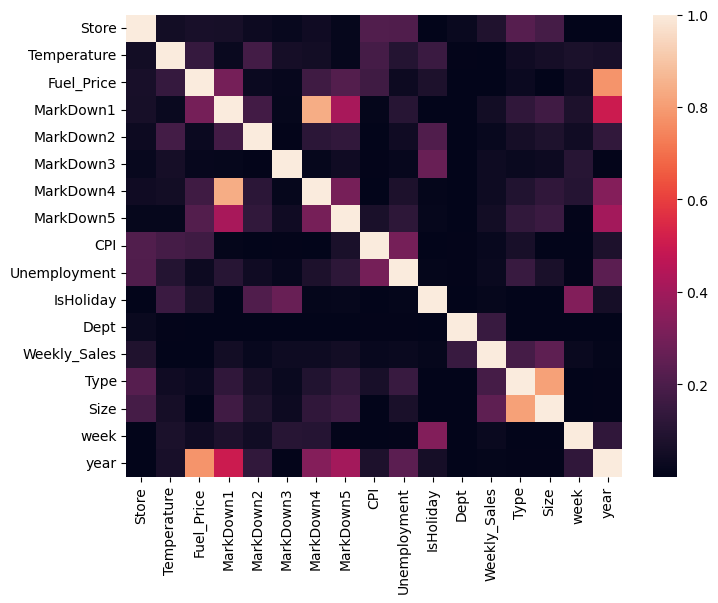

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr().abs())
plt.show()

In [33]:
df.corr()['Weekly_Sales'][:].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.244117
Dept            0.148749
MarkDown5       0.050598
MarkDown1       0.047249
MarkDown3       0.038522
MarkDown4       0.037470
week            0.024427
MarkDown2       0.020948
IsHoliday       0.012843
Fuel_Price      0.000089
Temperature    -0.002339
year           -0.010015
CPI            -0.021162
Unemployment   -0.025806
Store          -0.085117
Type           -0.182229
Name: Weekly_Sales, dtype: float64

I decided not to use fuel price, temperature, cpi and unemployment becouse of low correlation with weekly sales.

In [34]:
col = ['Fuel_Price','Temperature','CPI','Unemployment']
df.drop(col, axis=1, inplace=True)

Train test split

In [35]:
X= df.drop(['Weekly_Sales'], axis=1)
y= df['Weekly_Sales']

In [36]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (420212, 12)
Y Shape (420212,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.8)

print('Shape of x_train df',X_train.shape)
print('Shape of x_test df',X_test.shape)
print('Shape of y_train df',y_train.shape)
print('Shape of y_test df',y_test.shape)

Shape of x_train df (336169, 12)
Shape of x_test df (84043, 12)
Shape of y_train df (336169,)
Shape of y_test df (84043,)


I decided not to use gridsearch to find best parameters becouse it will take too much time to train it. We have to many rows and columns. I will try to find best params manually.

In [48]:
rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 4, min_samples_leaf = 2, random_state=42)

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, random_state=42)

In [50]:
y_pred = rf.predict(X_test)

Metrics calculations

In [51]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 22290747.726502918
Mean Absolute Error: 1950.5927993103314
R2 Score: 0.9565600213809946


In [60]:
joblib.dump(rf, 'model.h5')

['model.h5']